**Insurance companies can't predict the future, so how do they come up with such quote?**

By understanding the relationship between the demographics of primary beneficiaries (age, sex, BMI, number of children, smoker and location) and their medical costs, insurance companies will then (i) compare you to their data, (ii) predict your medical costs, and (iii) calculate a corresponding insurance quote. 

Let's take a look at the first two steps (grouping you and predicting your medical costs) with the following example:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
params={"figure.facecolor":(0.0,0.0,0.0,0),
        "axes.facecolor":(1.0,1.0,1.0,1.0),
        "savefig.facecolor":(0.0,0.0,0.0,0)}
plt.rcParams.update(params)

In [2]:
df=pd.read_csv("../input/insurance/insurance.csv")
df.columns=df.columns.to_series().apply(lambda x:x.title() if x!="bmi" else x.upper())
df.head()

,Age,Sex,BMI,Children,Smoker,Region,Charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

The dataset has 1338 observations/individuals which can be described in the following seven features:

* *Age*: the age of primary beneficiary

* *Sex*: female or male

* *BMI*: Body Mass Index (kg/m^2), a BMI between 18.5 kg/m^2 to 24.9 kg/m^2 indicates a healthy individual while anything less indicates underweight and more indicates overweight

* *Children*: the number of children/dependents covered by insurance

* *Smoker*: if the primary beneficiary smokes

* *Region*: the beneficiary's residential area in the US (northeast, southeast, southwest, northwest)

* *Charges*: medical costs billed by the insurance

In [ ]:
df.info()

There are no null values, but there is a mixture of categorical and numerical features (the categorical features will later be changed into numerical format).

Let's further examine each feature:

#### *Age*

In [ ]:
sns.scatterplot(x=df["Age"],y=df["Charges"],hue=df["Smoker"],palette={"yes":"indianred","no":"steelblue"})
plt.legend(bbox_to_anchor=(1,0.5),loc=6)

* There is a slight positive correlation between the age and charges.
* The data can also be separated into three groupings (low, average and high charges) depending on if the individual was a smoker.

#### *Sex*

In [ ]:
sns.boxplot(x=df["Sex"],y=df["Charges"],palette={"female":"yellow","male":"limegreen"})

* Including the "outliers", both females and males have similar range.
* Excluding the "outliers", males have higher charges.

#### *BMI*

In [ ]:
sns.scatterplot(x=df["BMI"],y=df["Charges"],hue=df["Smoker"],palette={"yes":"indianred","no":"steelblue"})
plt.legend(bbox_to_anchor=(1,0.5),loc=6)

* Charges do not necessarily increase with BMI, it depends on if the individual smokes.

#### Number of *Children*

In [ ]:
sns.boxplot(x=df["Children"],y=df["Charges"],palette="Set1")

* Having more children may be more expensive than those with no or less children.

#### *Smoker* Status

In [ ]:
sns.boxplot(x=df["Smoker"],y=df["Charges"],palette={"yes":"indianred","no":"steelblue"})

* Smokers have a chargers than non-smokers.

#### *Region*

In [ ]:
sns.boxplot(x=df["Region"],y=df["Charges"])

* On average there is no obvious relationship between the region and charges, but those in the southeast have a larger spread of higher charges.

Let us now change the categorical features into numerical format:

In [3]:
df["Sex"]=pd.get_dummies(df["Sex"],drop_first=True)
#where 0=female and 1=male

In [4]:
df["Smoker"]=pd.get_dummies(df["Smoker"],drop_first=True)
#where 0=non-smoker and 1=smoker

In [5]:
df_regions=pd.get_dummies(df["Region"])
df=df.join(df_regions)
df.drop(["Region"],axis=1,inplace=True)

The dataset now looks like this:

In [6]:
df.head()

,Age,Sex,BMI,Children,Smoker,Charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


We shall continue exploring our target variable, *Charges*:

In [ ]:
sns.distplot(a=df["Charges"],color="indigo",hist_kws=dict(edgecolor="black",linewidth=2),bins=20,kde=False)

In [ ]:
print("Charges have a skewness of {:.2f}.".format(stats.skew(df["Charges"])))

In [ ]:
df["Charges"].describe()

In [ ]:
plt.figure(figsize=(12,4))
sns.boxplot(df["Charges"],color="indigo")

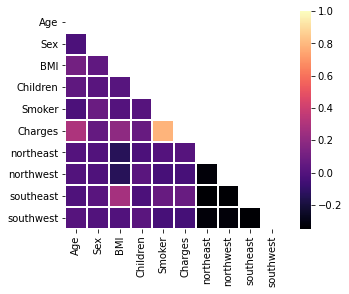

In [7]:
mask=np.zeros_like(df.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(df.corr(),annot=False,mask=mask,square=True,cmap="magma",linewidths=1,linecolor="white")

In [8]:
df.corr()

,Age,Sex,BMI,Children,Smoker,Charges,northeast,northwest,southeast,southwest
Age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
Sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
BMI,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
Children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
Smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
Charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


In [9]:
a=df["Charges"].loc[df["Smoker"]==1] #Ho: Smoker and non-smoker charges are the same.
b=df["Charges"].loc[df["Smoker"]==0] #Ha: Smoker and non-smoker charges are not the same.

stats.ttest_ind(a,b)

Ttest_indResult(statistic=46.664921172723716, pvalue=8.271435842177219e-283)

* The charges can range from USD 1121 to USD 63770 with an average charge of USD 13270 and a right skewness of 1.51.
* Charges are strongly correlated (0.79) and statistically significant (8e-283 pvalue) to whether the individual smokes or not.
* Age and BMI are weakly correlated to charges; sex, number of children and region have almost no correlation with charges.

The data will be split into a training and a testing set to train the model:

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x=df.drop(["Charges"],axis=1)
y=df["Charges"]

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=7)

In [16]:
print("Training set x shape:",x_train.shape,"and y shape",y_train.shape)
print("Testing set x shape:",x_test.shape,"and y shape",y_test.shape)

Training set x shape: (896, 9) and y shape (896,)
Testing set x shape: (442, 9) and y shape (442,)


As the data includes a range of continuous and discrete variables, the data will need to be scaled to ensure those larger values to not give an inaccurate higher weighting. The training set will be fit to the scaler and transformed, while the testing set will only be transformed to avoid any data leakage:

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler=StandardScaler()

In [19]:
x_train=scaler.fit_transform(x_train)

In [20]:
x_test=scaler.transform(x_test)

There are nine independent variables that can predict the target variable, *Charges*, but not all nine will have the same predictive power. Based on their scores (larger is better) and pvalues (smaller is better) it can then be decided if all nine or a selection of the variables will be used in the model. If only a selection will be used - as with scaling - it is important to fit and transform the training set while only transforming the testing set to prevent any data leakage:

In [21]:
from sklearn.feature_selection import SelectKBest,f_regression

In [22]:
selector=SelectKBest(f_regression,k="all")

In [40]:
x_selection=selector.fit(x_train,y_train)

In [45]:
x.columns

Index(['Age', 'Sex', 'BMI', 'Children', 'Smoker', 'northeast', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [31]:
x_selection.scores_

array([7.94849923e+01, 3.46815689e+00, 4.36805508e+01, 2.83600501e+00,
       1.44342260e+03, 6.82315883e-02, 7.39688840e-01, 5.68765383e+00,
       3.53076642e+00])

In [35]:
x_seletion.pvalues_

array([2.68888736e-018, 6.28888600e-002, 6.63666856e-011, 9.25221932e-002,
       8.97113856e-189, 7.93989365e-001, 3.89991145e-001, 1.72922260e-002,
       6.05650683e-002])

* As discovered previously, smoking is a strong predictor with the largest score (1e+03) and smallest pvalue (8e-189). This is followed by age and BMI.
* All of the nine variables are statistically significant with a pvalue of less than 0.05, so all the nine variables will be used in the model. Hence no need to transform the data.

Various regression models will be tested and evaluated based on their cross validated accuracy score:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
names=["LinearRegression","kNN","SVM","RandomForest"]
models=[LinearRegression(),KNeighborsRegressor(),SVR(),RandomForestRegressor()]
meancross=[]
stdcross=[]

In [ ]:
for model in models:
    model=model
    model.fit(x_train,y_train)
    rcross=cross_val_score(model,x_train,y_train,cv=5)
    meancross.append(rcross.mean())
    stdcross.append(rcross.std())

In [ ]:
results=pd.DataFrame({"Name":names,"Model":models,"RCrossMean":meancross,"RCrossStd":stdcross})
results.sort_values("RCrossMean",ascending=False)

Although the RandomForest model has the second largest spread of cross validation scores, the RandomForest performed the best so let's explore more ensemble models:

In [ ]:
from sklearn.ensemble import BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 

In [ ]:
names=["RandomForest","Bagging","GradientBoost","AdaBoost"]
models=[RandomForestRegressor(),BaggingRegressor(),GradientBoostingRegressor(),AdaBoostRegressor()]
meancross=[]
stdcross=[]

In [ ]:
for model in models:
    model=model
    model.fit(x_train,y_train)
    rcross=cross_val_score(model,x_train,y_train,cv=5)
    meancross.append(rcross.mean())
    stdcross.append(rcross.std())

In [ ]:
results=pd.DataFrame({"Name":names,"Model":models,"RCrossMean":meancross,"RCrossStd":stdcross})
results.sort_values("RCrossMean",ascending=False)

Out of the ensemble models, GradientBoost performed the best even though - again - it has the second largest spread of cross validation scores.

In [ ]:
model=GradientBoostingRegressor()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)

In [ ]:
sns.distplot(y_test,color="olivedrab",label="Actual values")
sns.distplot(y_predict,color="r",label="Predicted values")
plt.legend()
plt.xlim([0,60000])

In [ ]:
f,axes=plt.subplots(2,1,sharex=True)
sns.boxplot(y_test,color="olivedrab",whis=5,ax=axes[0])
sns.boxplot(y_predict,color="r",whis=5,ax=axes[1])
axes[0].set_xlabel("")
plt.xlabel("Charges")
axes[0].set_ylabel("Actual Price")
axes[1].set_ylabel("Predicted Price")

In [ ]:
print("The model's score is {:.2f}.".format(model.score(x_test,y_test)))

The base model gave an accuracy score of almost 86%, and the predicted values followed the general distribution of the actual values.

Try to predict your medical costs by inputting the relevant values in place for the '0's below:

In [ ]:
age=[0] # your age as a whole number
sex=[0] # 0 if you are a female OR 1 if you are a male
bmi=[0] # your calculated BMI as a whole or decimal number
children=[0] # your number of children/dependents as a whole number
smoker=[0] # 0 if you do not smoke OR 1 if you do smoke
northeast=[0] # 0 if you live in the northwest/southeast/southwest OR 1 if you live in the northeast
northwest=[0] # 0 if you live in the northeast/southeast/southwest OR 1 if you live in the northwest
southeast=[0] # 0 if you live in the northeast/northwest/southwest OR 1 if you live in the southeast
southwest=[0] # 0 if you live in the northeast/northwest/southeast OR 1 if you live in the southwest

In [ ]:
if (age==[0])&(sex==[0])&(bmi==[0])&(children==[0])&(smoker==[0])&(northeast==[0])&(northwest==[0])&(southeast==[0])&(southwest==[0]):
    print("Your predicted medical costs is USD x.")
else:
    your_data=pd.DataFrame({"Age":age,"Sex":sex,"BMI":bmi,"Children":children,"Smoker":smoker,"northeast":northeast,"northwest":northwest,"southeast":southeast,"southwest":southwest})
    your_data=scaler.transform(your_data)
    your_costs=model.predict(your_data)
    print("Your predicted medical costs is USD {:.2f}.".format(your_costs[0]))

Does this value seem right to you?